In [2]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import TruncatedSVD
from nltk import ngrams
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
model = Word2Vec.load("./models/word2vec/final_10mil_word2vec.model")

In [3]:
model.wv

In [4]:
model.wv.most_similar('თხა')

[('საპალნე', 0.6183655261993408),
 ('კვერნა', 0.6136003732681274),
 ('ძროხა', 0.610450029373169),
 ('შველი', 0.6093327403068542),
 ('ხოხობი', 0.6033813953399658),
 ('ფოცხვერი', 0.6029626131057739),
 ('ცხვარი', 0.6016797423362732),
 ('თხას', 0.6004265546798706),
 ('ჭაკი', 0.597181499004364),
 ('სვეს', 0.5964937210083008)]

In [5]:
# model.save("word2vec.model")

### Visualizing Word Embeddings

In [6]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) with SVD
    """    
    n_iters = 10
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)
    print(M_reduced)

    print("Done.")
    return M_reduced

In [7]:
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the Word2Vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind

In [8]:
def plot_embeddings(M_reduced, word2ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words" """
    for word in words:
        word_vec = M_reduced[word2ind[word]]
        plt.scatter(word_vec[0], word_vec[1], marker='x', color='red')
        plt.text(word_vec[0], word_vec[1], word, fontsize=9)
    plt.show()

In [9]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [10]:
words = ["მეფე", "დედოფალი", "ქალი", "კაცი"]

In [11]:
# -----------------------------------------------------------------
# Run Cell to Reduce 200-Dimensional Word Embeddings to k Dimensions
# Note: This should be quick to run
# -----------------------------------------------------------------
M, word2ind = get_matrix_of_vectors(model.wv, words)
M_reduced = reduce_to_k_dim(M, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.
Running Truncated SVD over 10004 words...
[[ 1.2632722   0.7533579 ]
 [ 1.8135431   0.7572123 ]
 [ 1.6325737   1.5043888 ]
 ...
 [ 1.8405628   0.16774705]
 [ 1.8215071  -0.3846947 ]
 [ 1.7830372  -0.5760653 ]]
Done.


In [35]:
sns.set(font_scale=1)

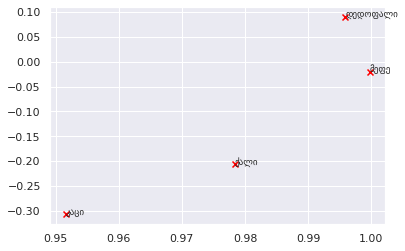

In [36]:
plot_embeddings(M_reduced_normalized, word2ind, words)

In [14]:
model.wv.most_similar(positive=['მეფე', 'ქალი'], negative=['კაცი'])

[('ტახტზე', 0.40144285559654236),
 ('i-ის', 0.3835844397544861),
 ('xii-ის', 0.3802604675292969),
 ('დედოფალი', 0.3790145218372345),
 ('მეფის', 0.3770633339881897),
 ('სიგიზმუნდ', 0.37378668785095215),
 ('მეფობდა', 0.3683779537677765),
 ('iii-ის', 0.36777937412261963),
 ('მეფეები', 0.3605758547782898),
 ('დემეტრე', 0.3586062788963318)]

In [29]:
model.wv.most_similar(
    positive=['მშვილდოსანი', 'ცოლი'], 
    negative=['ქმარი']
)

[('კირჩხიბი', 0.575498104095459),
 ('ღრიანკალი', 0.537632405757904),
 ('კურო', 0.5362414717674255),
 ('მორიელი', 0.5302557349205017),
 ('ვერძი', 0.5221663117408752),
 ('მერწყული', 0.5191493630409241),
 ('შეთავსების', 0.504426896572113),
 ('ურთიერთნდობა', 0.5035413503646851),
 ('სასწორი', 0.48609426617622375),
 ('თევზები', 0.4859570562839508)]

In [31]:
model.wv.most_similar(
    positive=['ბაქარი', 'ცოლი'], 
    negative=['ქმარი']
)

[('ზურაშვილი', 0.5313971638679504),
 ('კაკიაშვილი', 0.5305842161178589),
 ('ნატუკა', 0.5259012579917908),
 ('ზურა333', 0.5243187546730042),
 ('ლევანიკო', 0.5229456424713135),
 ('ჟივიძე', 0.5224558711051941),
 ('საშველები', 0.5186235904693604),
 ('ზაქაიძე', 0.518191397190094),
 ('ბუღრიძე', 0.5173429250717163),
 ('მრევლიშვილი', 0.5168269276618958)]

In [32]:
model.wv.most_similar(
    positive=['ბავშვი', 'დიდი'], 
    negative=['პატარა'])

[('ადამიანი', 0.35643741488456726),
 ('ხანია', 0.33954620361328125),
 ('ბავშვის', 0.33606427907943726),
 ('უდიდესი', 0.32642653584480286),
 ('აუნაზღაურებელი', 0.3238275349140167),
 ('რამხელა', 0.31815198063850403),
 ('არასრულწლოვანია', 0.31586235761642456),
 ('სადისტური', 0.31162646412849426),
 ('ბავშვები', 0.30134543776512146),
 ('ხარჯვაა', 0.29946595430374146)]

In [30]:
model.wv.most_similar("ბრწყინვალე")

[('შესანიშნავი', 0.45644110441207886),
 ('დიდებული', 0.43956077098846436),
 ('ჩინებული', 0.438639760017395),
 ('დააგვირგვინა', 0.4363951086997986),
 ('მაზიარა', 0.4328196942806244),
 ('ღვთიური', 0.4310285151004791),
 ('საუცხოო', 0.4308733344078064),
 ('მშვენიერი', 0.43077394366264343),
 ('დახვეწილობით', 0.42676424980163574),
 ('რეჟისურით', 0.42587947845458984)]